## Decision Tree
### https://modu.notion.site/Decision-Tree-c4dac5b9ee75448ba392b688adde57d1

#### 장점

- 데이터의 전처리 (정규화, 결측치, 이상치 등) 를 하지 않아도 된다.
- 수치형과 범주형 변수를 한꺼번에 다룰 수 있다.

#### 한계

- 만약 샘플의 사이즈가 크면 효율성 및 가독성이 떨어진다.
- **과적합으로 알고리즘 성능이 떨어질 수 있다.**
    - 이를 극복하기 위해서 트리의 크기를 사전에 제한하는 튜닝이 필요하다.
- **한 번에 하나의 변수만을 고려하므로 변수간 상호작용을 파악하기가 어렵다.**
- 결정트리는 Hill Climbing 방식 및 Greedy 방식을 사용하고 있다.
    - 일반적인 Greedy 방식의 알고리즘이 그렇듯이 이 방식은 최적의 해를 보장하지는 못한다.
- **약간의 차이에 따라 (레코드의 개수의 약간의 차이) 트리의 모양이 많이 달라질 수 있다.**
    - 두 변수가 비슷한 수준의 정보력을 갖는다고 했을 때, 약간의 차이에 의해 다른 변수가 선택되면 이 후의 트리 구성이 크게 달라질 수 있다.
- **이같은 문제를 극복하기 위해 등장한 모델이 바로 랜덤포레스트이다.**
    - 같은 데이터에 대해 의사결정나무를 여러 개 만들어 그 결과를 종합해 예측 성능을 높이는 기법이다.

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecicionTreeClassifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================


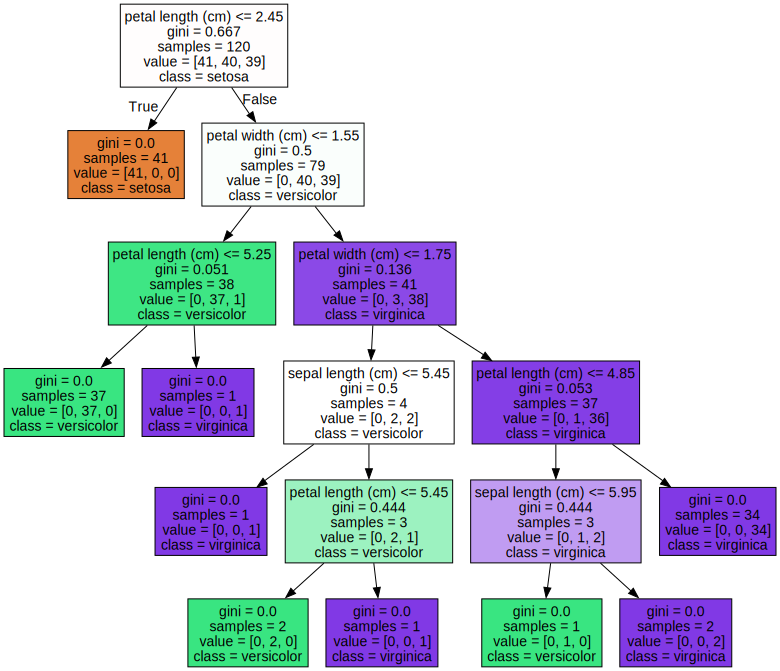

In [17]:
print('===============max_depth의 제약이 없는 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

* petal length(cm) <= 2.45 와 같이 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로 이런 것이 없는 것은 리프노드입니다.
* gini는 다음의 value = [ ] 로 주어진 데이터 분포에서의 지니계수
* samples : 현 규칙에 해당하는 데이터 건수
* value = [ ] 클래스 값 기반의 데이터 건수 ( 이번 예제의 경우 0: Setosa, 1 : Veericolor, 2: Virginia 를 나타냄 )

===============max_depth=3인 경우의 Decision Tree 시각화==================


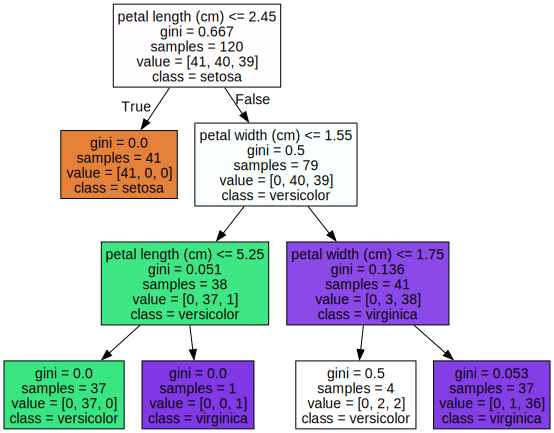

In [18]:
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============max_depth=3인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_split=4인 경우의 Decision Tree 시각화==================


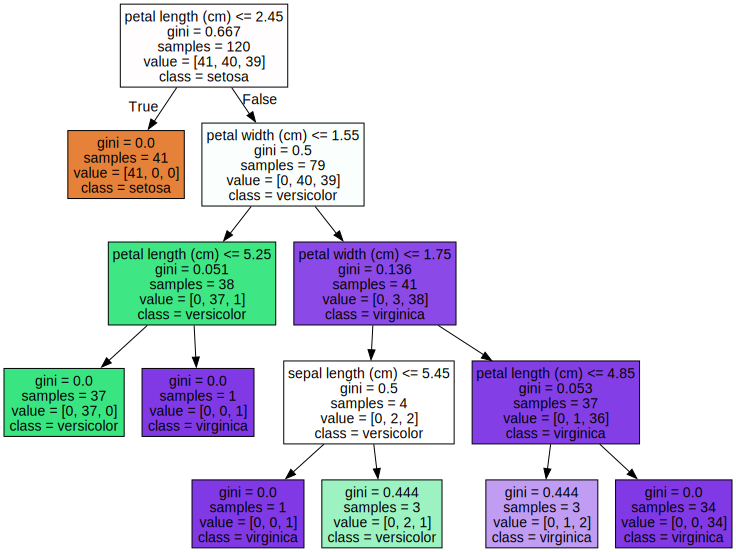

In [19]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_split=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================


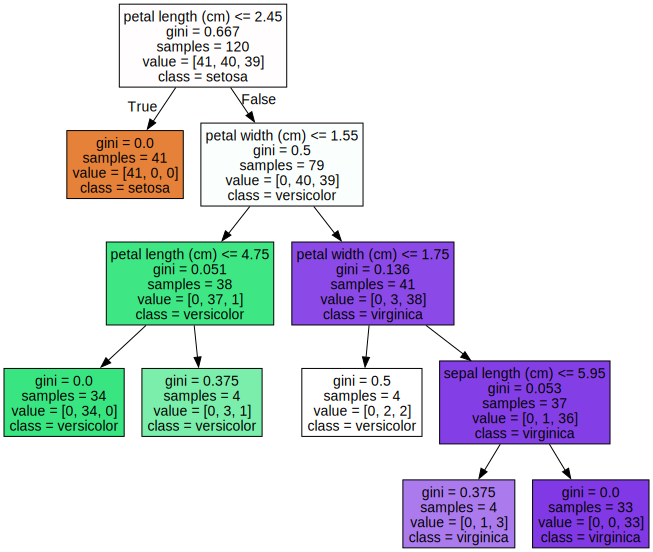

In [20]:
# DecicionTreeClassifier 생성 (min_samples_leaf=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [24]:
# dt_clf_1 = DecisionTreeClassifier(random_state=0 , max_depth=5)

# dt_clf.fit(X_train, y_train)
# pred = dt_clf.predict(X_test)

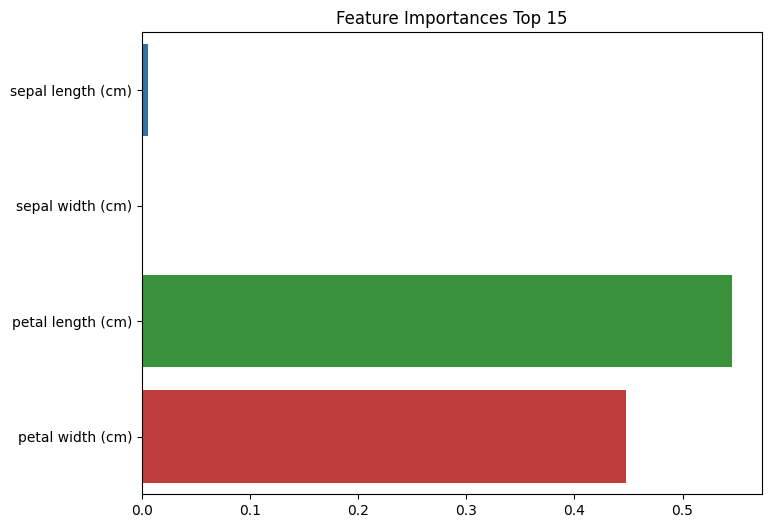

In [22]:
from sklearn.datasets import load_iris
import seaborn as sns
import matplotlib.pyplot as plt

iris=load_iris()
plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=dt_clf.feature_importances_, y=iris.feature_names)
plt.show()

Feature Importances:
[0.006 0.    0.546 0.448]

sepal length (cm): 0.006
sepal width (cm): 0.000
petal length (cm): 0.546
petal width (cm): 0.448


<Axes: >

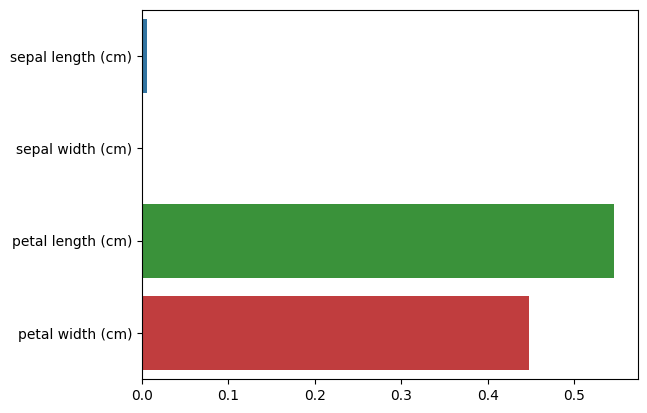

In [23]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## Decision Tree의 과적합 (Overfitting)

### sklearn.datasets.make_classification
* sklearn.datasets.make_classification(n_samples=100, n_features=20, *, n_informative=2, n_redundant=2, n_repeated=0, n_classes=2, n_clusters_per_class=2, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=None)[source]

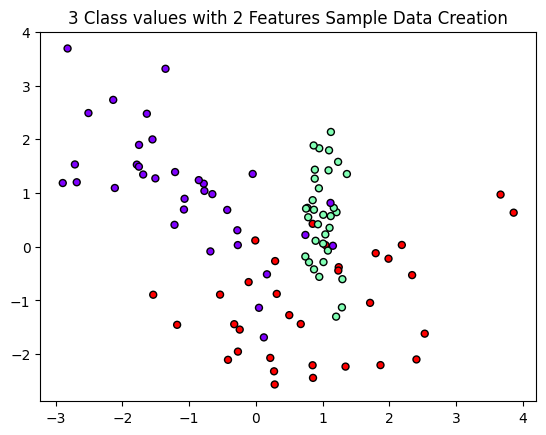

In [33]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 feature는 2개, 클래스는 3가지 유형의 분류(classification) 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

In [34]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

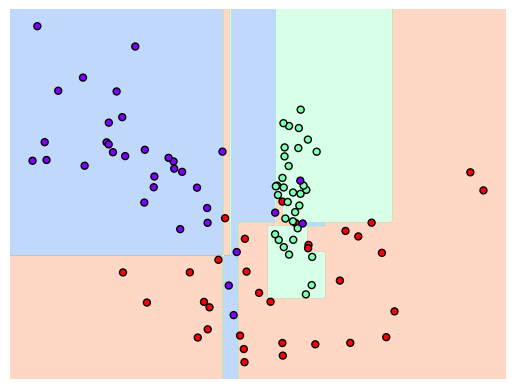

In [35]:
# 특정한 트리 생성에 제약이 없는(전체 default 값) Decision Tree의 학습과 결정 경계(Decision Boundary) 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

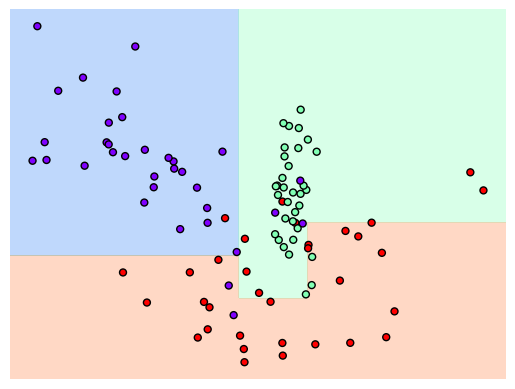

In [36]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계(Decision Boundary) 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

### Decision Tree의 과적합을 줄이기 위한 파라미터 튜닝
* (1) max_depth 를 줄여서 트리의 깊이 제한
* (2) min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터의 수를 높이기
* (3) min_samples_leaf 를 높여서 말단 노드가 되는데 필요한 샘플 데이터의 수를 높이기
* (4) max_features를 높여서 분할을 하는데 고려하는 feature의 수 제한
